In [1]:
%load_ext autoreload
%autoreload 2


from text3d2video.artifacts.animation_artifact import AnimationArtifact
from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map

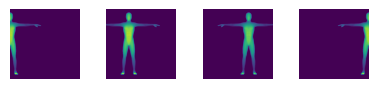

In [2]:
animation = AnimationArtifact.from_wandb_artifact_tag("mixamo-sideways:latest")

n_images = 4

frames = animation.frame_nums(n_images)
meshes = animation.load_frames(frames)
cameras = animation.cameras(frames)

verts_uvs, faces_uvs = animation.texture_data()

depth_maps = render_depth_map(meshes, cameras)
display_ims(depth_maps)

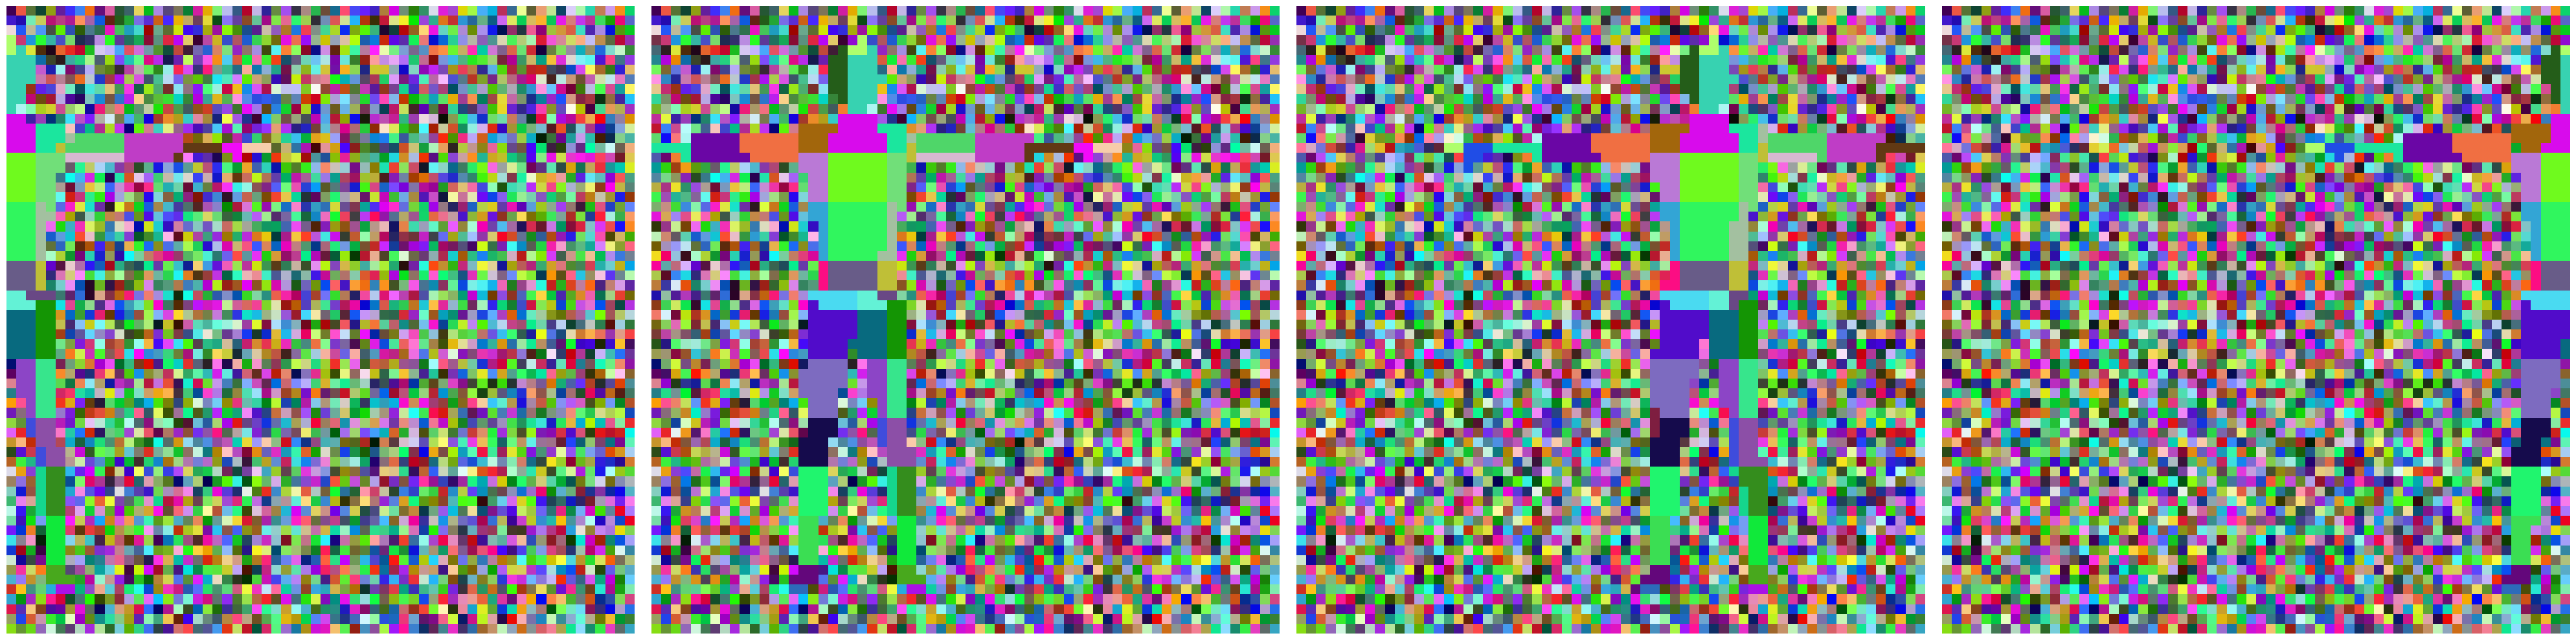

In [10]:
from text3d2video.uv_noise import prepare_uv_initialized_latents
import torchvision.transforms.functional as TF

latents = prepare_uv_initialized_latents(
    meshes, cameras, verts_uvs, faces_uvs, latent_texture_res=10
)

def display_latents(latents):
    latents_ims = latents[:, 0:3, :, :].cpu()
    latents_ims = [TF.to_pil_image(latent) for latent in latents_ims]
    display_ims(latents_ims, scale=10)

display_latents(latents)

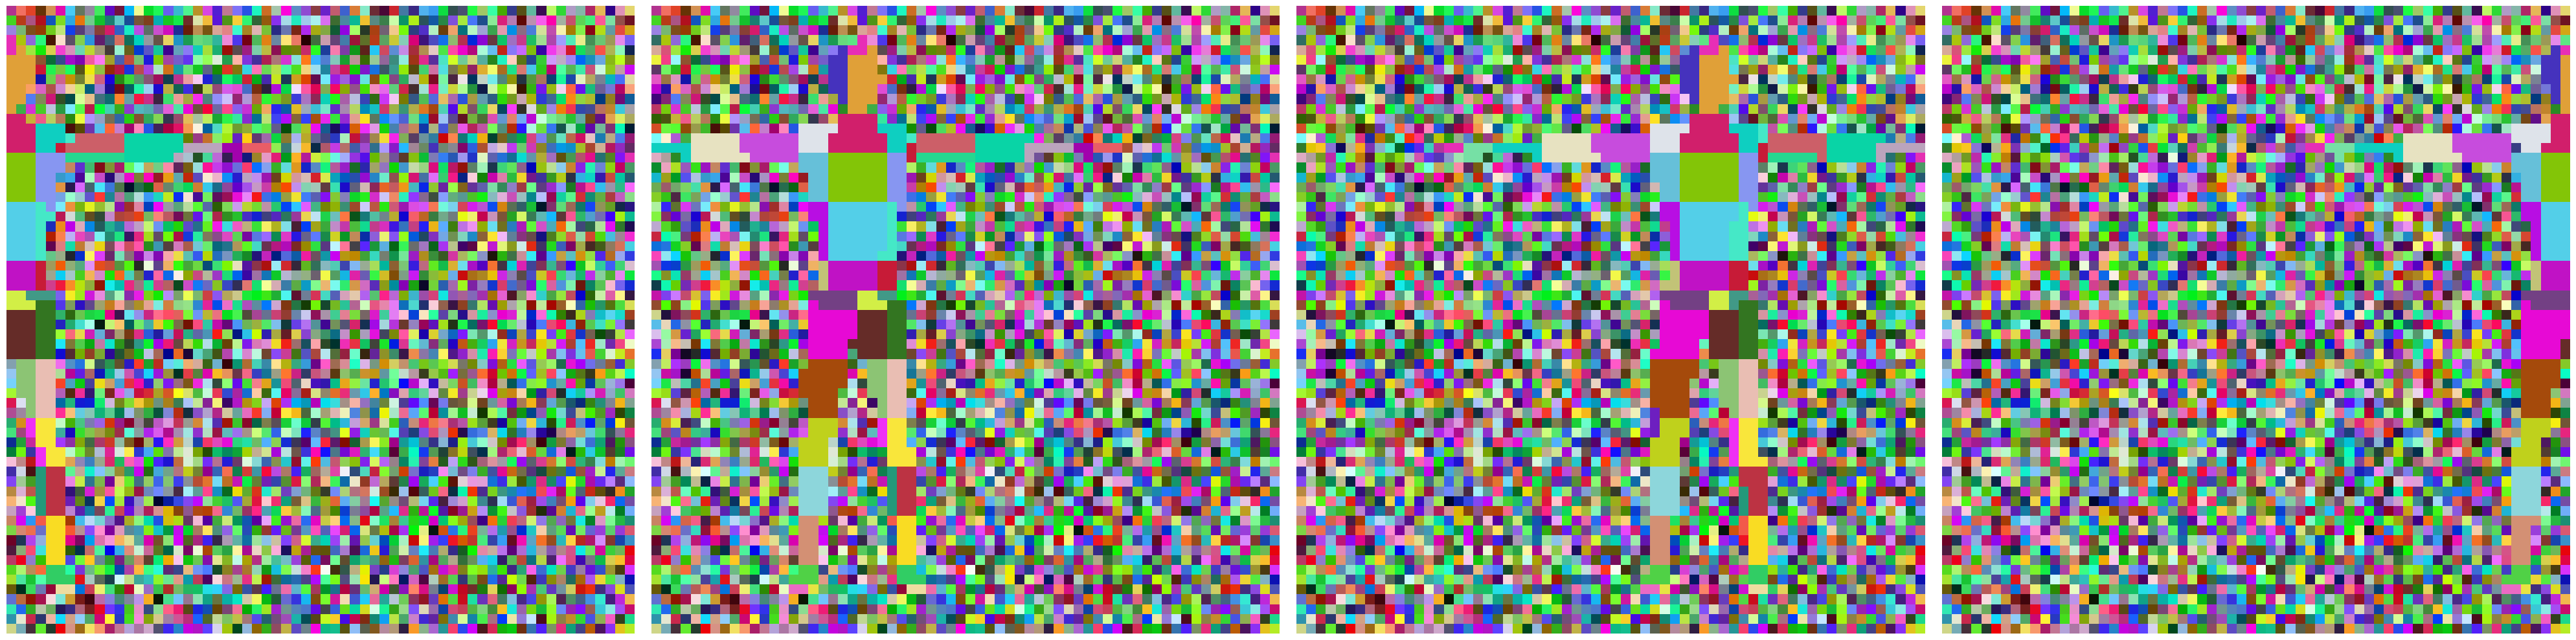

In [27]:
from text3d2video.generative_rendering.configs import NoiseInitializationConfig, NoiseInitializationMethod
from text3d2video.uv_noise import prepare_latents

noise_cfg = NoiseInitializationConfig(
    method=NoiseInitializationMethod.UV,
)
noise_cfg.uv_texture_res = 10

latents = prepare_latents(
    meshes, cameras, verts_uvs, faces_uvs, noise_cfg
)

display_latents(latents)